Для датасету

https://archive.ics.uci.edu/ml/datasets/wine+quality

побудувати модель лінійної регресії

Обов'язкові кроки:

- первинний аналіз даних (відстуність пропусків, наявність категоріальних фіч, ...)
- фича інжиніринг (побудувати 1-2 нові фічі)
- масштабування фіч
- поділ датасету на тренувальну, валідаційну та тестову частини
- тренування базової моделі із дефолтними гіперпараметрами
- підбір гіперпараметрів
- оцінка результатів

In [ ]:
# Підключаємо Google Drive з датасетом
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Імпортуємо всі необхідні бібліотеки
import pandas as pd
import seaborn as sns
import numpy as np

sns.set()

%config InlineBackend.figure_format = "png"

# зчитуємо набір даних
datasets_path = "/content/drive/MyDrive/Colab Notebooks/wine_quality/"
wq_red_df = pd.read_csv(datasets_path + "winequality-red.csv", sep=";")
wq_white_df = pd.read_csv(datasets_path + "winequality-white.csv", sep=";")

In [ ]:
# Давайте подивимось на інфо датасетів
print(wq_red_df.info(), "\n")
print(wq_red_df.isna().sum(), "\n")

print(wq_white_df.info(), "\n")
print(wq_white_df.isna().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides      

Датасет не мають NaN значень. В обох датасетах присутні 11 числових фічей, які описують вино, та таргет quality, який є фінальною оцінкой юкості вина.

In [ ]:
# Давайте подивимось на перші записи
wq_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wq_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Виглядає так, що ми можемо поєднати ці датасети та працювати далі з одним. Але, спочатку, давайте додамо нову фічу `type`, якою позначимо наші датасети за кольором вина.

In [ ]:
# Позначимо червоне вино нулем, а біле одиницею
wq_red_df["type"] = 0
wq_white_df["type"] = 1

In [ ]:
# Тепер ми можемо об'єднати датасети
wq_df = pd.concat([wq_red_df, wq_white_df])
wq_df.info()
wq_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
wq_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [ ]:
# Тепер можемо змінити типи даних, щоб зменшити объем датасету, але це не критично для датасету такого розміру
wq_df = wq_df.astype(
    {
        "fixed acidity": "float32",
        "volatile acidity": "float32",
        "citric acid": "float32",
        "residual sugar": "float32",
        "chlorides": "float32",
        "free sulfur dioxide": "float32",
        "total sulfur dioxide": "float32",
        "density": "float32",
        "pH": "float32",
        "sulphates": "float32",
        "alcohol": "float32",
        "quality": "int8",
    },
)

wq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float32
 1   volatile acidity      6497 non-null   float32
 2   citric acid           6497 non-null   float32
 3   residual sugar        6497 non-null   float32
 4   chlorides             6497 non-null   float32
 5   free sulfur dioxide   6497 non-null   float32
 6   total sulfur dioxide  6497 non-null   float32
 7   density               6497 non-null   float32
 8   pH                    6497 non-null   float32
 9   sulphates             6497 non-null   float32
 10  alcohol               6497 non-null   float32
 11  quality               6497 non-null   int8   
 12  type                  6497 non-null   int64  
dtypes: float32(11), int64(1), int8(1)
memory usage: 387.0 KB


Як можно побачити, навіть після таких прости перетворень об'єм датасету зменшився майже в 2 рази.

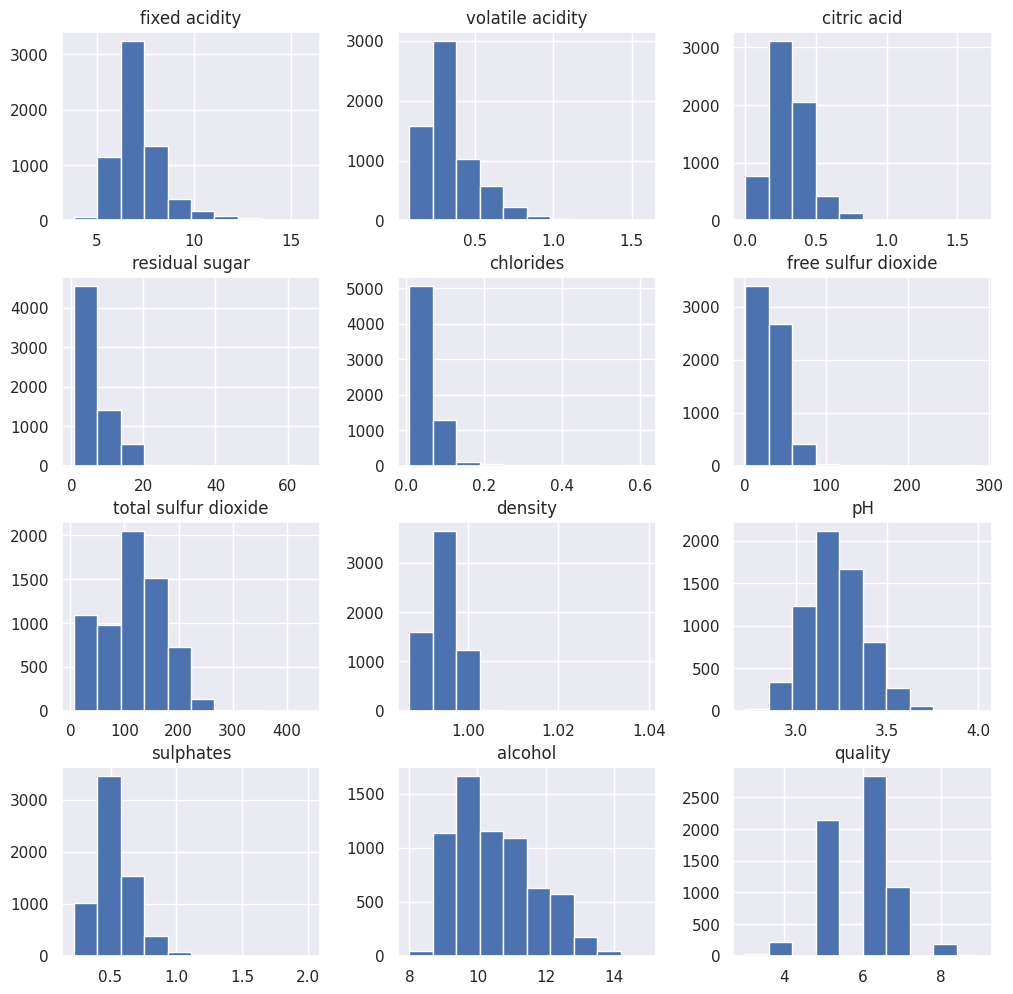

In [ ]:
# Тепер давайте побудуємо графіки, щоб подивитись на розподіл та корреляцію фіч
wq_df.drop(columns="type").hist(figsize=(12, 12));

Бачимо, що тут немає нормального розподілу даних.

In [ ]:
sns.pairplot(wq_df, hue="quality");

Output hidden; open in https://colab.research.google.com to view.

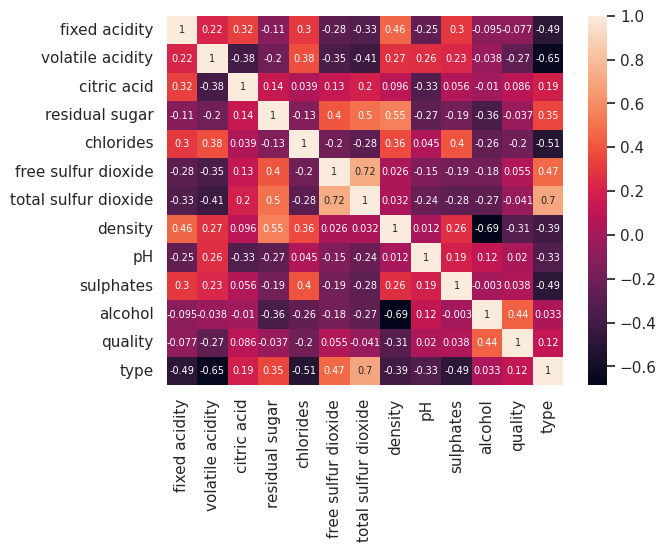

In [ ]:
corr_matrix = wq_df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 7});

Бачимо, що між собою наче корелюють фічі `fixed acidity` <=> `citric acid`, `free sulfur dioxide` <=> `total sulfur dioxide` та `fixed acidity` <=> `density`.

In [ ]:
# Подивимось, які фічі максимально корелюють з таргетом
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
type                    0.119323
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='count'>

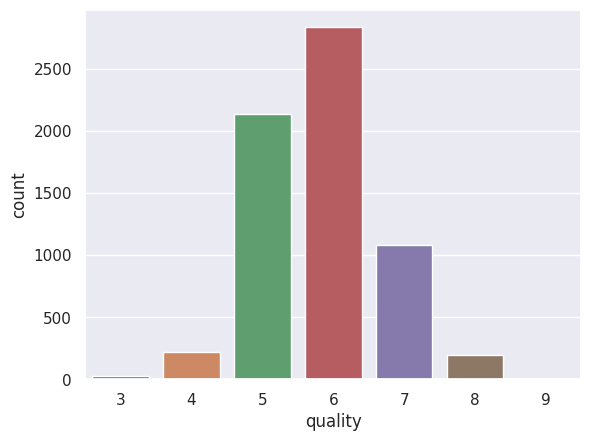

In [ ]:
sns.countplot(x="quality", data=wq_df)

Щоб зменшити кількість кореляцій між фічами ми можемо, наприклад, порахувати SO2 (який, до речі, є природним консервантом). Згідно з https://www.omnicalculator.com/food/molecular-so2 він рахується за формулою `free sulfur dioxide` / 1 + (10 ^ pH - 1.81). У нас ці дані є, тож давайте розрахуємо це.

Також ми можемо визначити, що більш якісне вино має `quality` > 6. Це дає нам змогу запровадити ще одну фічу (`premium`), яка буде визначати, чи є це вино преміальної якості.

In [ ]:
# Додаємо нові фічі
wq_df["so2"] = wq_df["free sulfur dioxide"] / (1 + pow(10, wq_df["pH"] - 1.81))
wq_df["premium_quality"] = np.where(wq_df["quality"] > 6, 1, 0)
wq_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,so2,premium_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.215185,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0.978585,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0.513983,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0.726893,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0.215185,0


In [ ]:
# Розбиваємо датасет на X та Y
X = wq_df.drop(columns="quality")
Y = wq_df["quality"]

In [ ]:
# Масштабуємо фічі, використовуючи StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Тепер поділемо датасет на тренувальну, валідаційну та тестову частини за схемою 60-20-20
from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

In [ ]:
# Тепер спробуємо потренувати модель лінійної регресії
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

predict = reg_model.predict(x_test)

# Коефіцієнти
print("Коефіцієнти: \n", reg_model.coef_)

# Подивимось на акуратність моделі на тестових даних
print("Акуратність моделі:", reg_model.score(x_test, y_test) * 100)

Коефіцієнти: 
 [ 0.01508804 -0.17620735 -0.00108927  0.10482785 -0.00505898  0.01103658
 -0.05361808 -0.06759839  0.04887994  0.03660053  0.15237689 -0.08541481
  0.07026562  0.56509598]
Акуратність моделі: 60.857184551311505


In [ ]:
# Тепер давайте зробимо тюнинг гіперпараметрів, підібравши оптимальні значення за допомогою GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid={
        "fit_intercept": [True, False],
        "n_jobs": [1, 2, 4, 6, 8, 10],
        "positive": [True, False],
    }
)
grid_search.fit(x_valid, y_valid)

print("Результати для LineаrRegression:", "\n")
print("Найкращий score:", grid_search.best_score_,)
print("Найкращі параметри:", grid_search.best_params_, "\n")

# Подивимось на акуратність моделі на тестових даних
print(
    "Акуратність моделі з тюнінгованими гіперпараметрами:",
    grid_search.best_estimator_.fit(x_train, y_train).score(x_test, y_test) * 100,
)

Результати для LineаrRegression: 

Найкращий score: 0.6476618617449442
Найкращі параметри: {'fit_intercept': True, 'n_jobs': 1, 'positive': False} 

Акуратність моделі з тюнінгованими гіперпараметрами: 60.857184551311505


Схоже, що ми вже використали найкращі параметри, i на наших даних тюнинг гіперпораметрів ситуацію не змінює, тому що для LinearRegression параметр `fit_intercept` по дефолту і так `True`, а `positive` - `False`.

In [ ]:
# тепер спробуємо використати інший скейлер для масштабування фіч
X = wq_df.drop(columns="quality")
Y = wq_df["quality"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

x_train, x_rem, y_train, y_rem = train_test_split(X, Y, train_size=0.6)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

reg_model = LinearRegression(n_jobs=1)
reg_model.fit(x_train, y_train)

predict = reg_model.predict(x_test)

# Коефіцієнти
print("Коефіцієнти: \n", reg_model.coef_)

# Подивимось на акуратність моделі на тестових даних
print("Акуратність моделі:", reg_model.score(x_test, y_test) * 100)

Коефіцієнти: 
 [-0.22444564 -1.68510597 -0.12984507  1.09661262 -0.17141818  0.46123217
 -0.35421077 -0.38440721  0.10140387  0.44897865  0.95555806 -0.22242518
  0.29503865  1.43594046]
Акуратність моделі: 64.22292566178443


Як бачимо, в даному випадку інший скейлер трохи покращив результат моделі. Давайте теперь подивимось на інші моделі, будемо використовувати далі дані, масштабовані за допомогою MinMaxScaler.

In [ ]:
# Створимо модель Ridge з дефолтними параметрами
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

predict = ridge_model.predict(x_test)

# Коефіцієнти
print("Коефіцієнти: \n", ridge_model.coef_)

# Подивимось на акуратність моделі на тестових даних
print("Акуратність моделі:", ridge_model.score(x_test, y_test) * 100)

Коефіцієнти: 
 [-0.05245598 -1.58779278 -0.14652069  0.92755836 -0.30763913  0.81845142
 -0.39446819 -0.18529804  0.05778603  0.33766377  0.91130675 -0.18160132
  0.01093307  1.43506565]
Акуратність моделі: 64.96135001029


Результат майже не відрізняється від результату звичайної лінійної регресії.

In [ ]:
# Тепер давайте зробимо тюнинг гіперпараметрів, підібравши оптимальні значення за допомогою GridSearchCV
grid_search = GridSearchCV(
    estimator=Ridge(),
    param_grid={
        "alpha": [i for i in range(1, 11)],
        "fit_intercept": [True, False],
        "copy_X": [True, False],
        "tol": [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
        "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
    }
)
grid_search.fit(x_valid, y_valid)

print("Результати для Ridge моделі:", "\n")
print("Найкращий score:", grid_search.best_score_)
print("Найкращі параметри:", grid_search.best_params_, "\n")

# Подивимось на акуратність моделі на тестових даних
print(
    "Акуратність моделі з тюнінгованими гіперпараметрами:",
    grid_search.best_estimator_.fit(x_train, y_train).score(x_test, y_test) * 100,
)

Результати для Ridge моделі: 

Найкращий score: 0.6334473511147468
Найкращі параметри: {'alpha': 2, 'copy_X': False, 'fit_intercept': True, 'solver': 'sag', 'tol': 0.1} 

Акуратність моделі з тюнінгованими гіперпараметрами: 64.96009141553368


Для Ridge моделі тюнінг гіперпараметрів не покращує (чи не погіршує) результат. Можливо, потрібно спробувати тюнінг інших параметрів.

In [ ]:
# Створимо модель SGDRegressor з дефолтними параметрами
from sklearn.linear_model import SGDRegressor

sgd_reg_model = SGDRegressor()
sgd_reg_model.fit(x_train, y_train)

# Коефіцієнти
print("Коефіцієнти: \n", sgd_reg_model.coef_)

# Подивимось на акуратність моделі на тестових даних
print("Акуратність моделі:", sgd_reg_model.score(x_test, y_test) * 100)

Коефіцієнти: 
 [1.00610512 0.42403345 0.51111702 0.1863017  0.33395345 0.22126593
 0.19699605 0.52424973 1.19490278 0.72265497 1.264214   0.44873475
 0.37821252 1.4585941 ]
Акуратність моделі: 58.80435771734629


In [ ]:
# Тепер давайте зробимо тюнінг гіперпараметрів
grid_search = GridSearchCV(
    estimator=SGDRegressor(),
    param_grid={
      "penalty": ["l2", "l1", "elasticnet"],
      "alpha": 10.0 ** -np.arange(1, 7),
      "fit_intercept": [True, False],
      "shuffle": [True, False],
      "power_t": np.arange(0.25, 1.25, 0.25),
      "average": [True, False],
    }
)
grid_search.fit(x_valid, y_valid)

print("Результати для SGDRegressor моделі:", "\n")
print("Найкращий score:", grid_search.best_score_)
print("Найкращі параметри:", grid_search.best_params_, "\n")

# Подивимось на акуратність моделі на тестових даних
print(
    "Акуратність моделі з тюнінгованими гіперпараметрами:",
    grid_search.best_estimator_.fit(x_train, y_train).score(x_test, y_test) * 100,
)

Результати для SGDRegressor моделі: 

Найкращий score: 0.6095221949281139
Найкращі параметри: {'alpha': 1e-05, 'average': False, 'fit_intercept': True, 'penalty': 'l2', 'power_t': 0.25, 'shuffle': True} 

Акуратність моделі з тюнінгованими гіперпараметрами: 30.20953529979814


В цьому випадку результат після тюнінгу - погіршення якості моделі. Тож потрібно використовувати дефолтні параметри, або спробувати тюнінг інших.

In [ ]:
# Створимо модель Lasso з дефолтними параметрами
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

# Коефіцієнти
print("Коефіцієнти: \n", lasso_model.coef_)

# Подивимось на акуратність моделі на тестових даних
print("Акуратність моделі:", lasso_model.score(x_test, y_test) * 100)

Коефіцієнти: 
 [-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0.]
Акуратність моделі: -0.004799728952775695


In [ ]:
# Тепер давайте зробимо тюнінг гіперпараметрів
grid_search = GridSearchCV(
    estimator=Lasso(),
    param_grid={
        "alpha": (np.logspace(-8, 8, 100)),
        "positive": [True, False],
        "selection": ["cyclic", "random"]
    }
)
grid_search.fit(x_valid, y_valid)

print("Результати для Lasso моделі:", "\n")
print("Найкращий score:", grid_search.best_score_)
print("Найкращі параметри:", grid_search.best_params_, "\n")

# Подивимось на акуратність моделі на тестових даних
print(
    "Акуратність моделі з тюнінгованими гіперпараметрами:",
    grid_search.best_estimator_.fit(x_train, y_train).score(x_test, y_test) * 100,
)

Результати для Lasso моделі: 

Найкращий score: 0.6631075970521277
Найкращі параметри: {'alpha': 5.214008287999695e-05, 'positive': False, 'selection': 'random'} 

Акуратність моделі з тюнінгованими гіперпараметрами: 64.19578143095936


Для Lasso тюнінг гіперапараметрів значно виправив акуратність моделі.

# Висновок
Підбір моделі для лінійної регресії можна значно спростити за домопогою оптимізаторів гіперпараметрів, таких як GridSearchCV. Тюнінг моделі може привести як до покращення предікту моделі, так і до погіршення. Але пошук оптимальних значень для гіперпараметрів значно швидше виконувати в автоматичному режимі, ніж вручу.

В даному експерименті найкращій результат показала модель Ridge з дефолтними параметрами. Для більш якісних результатів можно провести додаткові експерименти з тюнінгу параметрів, або покращення фічей датасету.